# 필요한 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import urllib.request
import json
from pandas import json_normalize
from urllib.parse import urlencode, quote_plus, unquote

# 파일 로드 및 DataFrame 작업

In [2]:
# JSON 로드
with open('/content/drive/MyDrive/Colab Notebooks/DM2302/Project/UsersGamesData.json', 'r', encoding='utf-8') as file_a:
    json_file = json.load(file_a)

In [3]:
# JSON 데이터를 DataFrame 형태로 변환
# DF 구조체 초기화
pre_df = []

# 추출 작업 시작
for user, game_list in json_file.items():
    for game in game_list:
        if game['playtime_forever'] > 120:  # 플레이타임이 2시간 이상인 게임만을 대상으로
            pre_df.append([user, game['appid'], game['playtime_forever']])  # 사용자 ID, 게임 ID, 플레이타임 기록

# DataFrame 조작 및 통계치 확인

In [4]:
df = pd.DataFrame(pre_df)
df.columns = ['UserID', 'GameID', 'PlayTime']
df.head()

,UserID,GameID,PlayTime
0,76561199029457670,10,48281
1,76561199029457670,240,737
2,76561199029457670,17390,147
3,76561199029457670,550,355
4,76561199029457670,230410,245


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653374 entries, 0 to 653373
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   UserID    653374 non-null  object
 1   GameID    653374 non-null  int64 
 2   PlayTime  653374 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 15.0+ MB


In [ ]:
df.describe(include='all')

,UserID,GameID,PlayTime
count,653374,6.533740e+05,6.533740e+05
unique,4411,NaN,NaN
top,76561198102767019,NaN,NaN
freq,7342,NaN,NaN
mean,NaN,4.771690e+05,2.676748e+03
std,NaN,3.824186e+05,1.844596e+04
min,NaN,1.000000e+01,1.210000e+02
25%,NaN,2.518500e+05,2.090000e+02
50%,NaN,3.771600e+05,3.140000e+02
75%,NaN,5.759400e+05,8.170000e+02


In [ ]:
df['UserID'].value_counts()

76561198102767019    7342
76561197968410781    7298
76561198264362271    6566
76561198150396857    6328
76561198032550800    5800
                     ... 
76561198992662761       1
76561198259075441       1
76561198364449275       1
76561199195911941       1
76561198965862097       1
Name: UserID, Length: 4411, dtype: int64

In [ ]:
df['GameID'].value_counts()

730        3342
578080     2189
440        2080
550        2056
218620     1820
           ... 
2287970       1
2432110       1
1608270       1
2306740       1
702700        1
Name: GameID, Length: 20245, dtype: int64

<ipython-input-5-a1b948d602c8>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_series = pd.Series([])


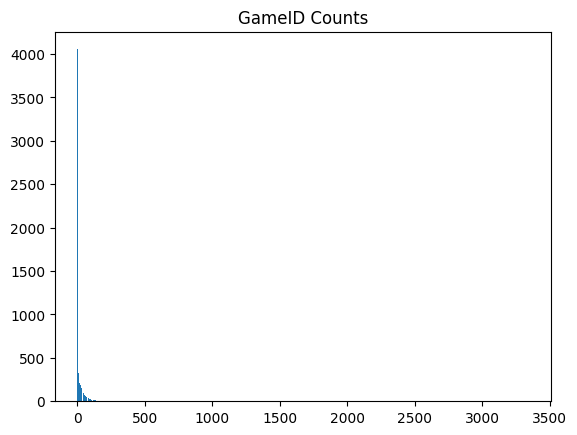

In [5]:
import matplotlib.pyplot as plt

new_series = pd.Series([])

plt_df = df['GameID'].value_counts()
i = 0
for value in plt_df.values:
    new_series[i] = value
    i = i + 1
plt_df = new_series

plt.bar(plt_df.value_counts().index, plt_df.value_counts().values)
plt.title("GameID Counts")
plt.show()

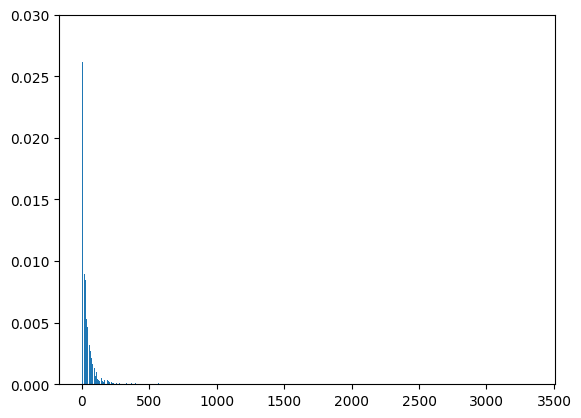

In [ ]:
plt.bar(plt_df.value_counts().index, plt_df.value_counts().values / 20245)
plt.ylim(0, 0.03)
plt.show()

<ipython-input-7-d3ef9ee3fe7f>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_series = pd.Series([])


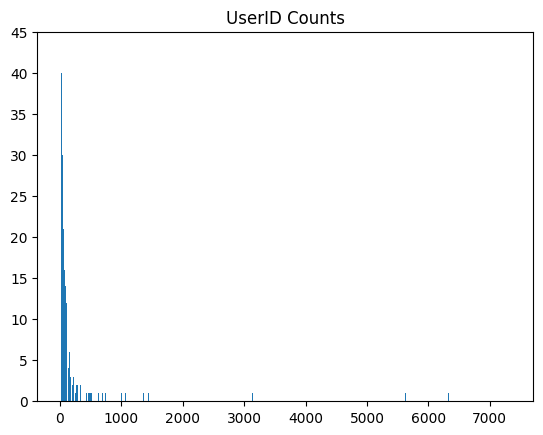

In [7]:
new_series = pd.Series([])

plt_df = df['UserID'].value_counts()
i = 0
for value in plt_df.values:
    new_series[i] = value
    i = i + 1
plt_df = new_series

plt.bar(plt_df.value_counts().index, plt_df.value_counts().values)
plt.ylim(0, 45)
plt.title("UserID Counts")
plt.show()

# Spark와 FP-Growth 적용

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
py_df = spark.createDataFrame(df)

In [ ]:
# CSV에서 DF 불러오는 경우
py_df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/DM2302/Project/id_premitive.csv', header=True, inferSchema=True)
py_df = py_df.drop('_c0')

In [ ]:
py_df.printSchema()
py_df.show(10)

root
 |-- UserID: string (nullable = true)
 |-- GameID: long (nullable = true)
 |-- PlayTime: long (nullable = true)

+-----------------+------+--------+
|           UserID|GameID|PlayTime|
+-----------------+------+--------+
|76561199029457670|    10|   48281|
|76561199029457670|   240|     737|
|76561199029457670| 17390|     147|
|76561199029457670|   550|     355|
|76561199029457670|230410|     245|
|76561199029457670|252950|     321|
|76561199029457670|257750|     780|
|76561199029457670|   730|   70374|
|76561199029457670|322330|     315|
|76561199029457670|386940|    1445|
+-----------------+------+--------+
only showing top 10 rows



In [ ]:
data_grouped = py_df.groupBy("UserID").agg(collect_set('GameID').alias('GamesID'))

In [ ]:
data_grouped.printSchema()
data_grouped.show(10)

root
 |-- UserID: string (nullable = true)
 |-- GamesID: array (nullable = false)
 |    |-- element: long (containsNull = false)

+-----------------+--------------------+
|           UserID|             GamesID|
+-----------------+--------------------+
|76561197960272730|[555160, 221380, ...|
|76561197960287391|[257850, 17300, 8...|
|76561197960308352|[260790, 42700, 7...|
|76561197960309472|[223470, 204450, ...|
|76561197960767217|[110800, 251150, ...|
|76561197961524908|[244210, 24240, 2...|
|76561197961654602|[253030, 34330, 2...|
|76561197961658650|[1938090, 230410,...|
|76561197961688673|[34330, 1142710, ...|
|76561197961861494|[381210, 730, 369...|
+-----------------+--------------------+
only showing top 10 rows



In [ ]:
from pyspark.ml.fpm import FPGrowth
fpGrowth = FPGrowth(itemsCol="GamesID", minSupport=0.08, minConfidence=0.5)
model = fpGrowth.fit(data_grouped)

In [ ]:
freq_01 = model.freqItemsets
asso_01 = model.associationRules
print(f"Count of frequent itemsets: {freq_01.count()}\nCount of association rules: {asso_01.count()}\n")
freq_01.sort(desc('freq')).show()
asso_01.sort(desc('lift')).show()

Count of frequent itemsets: 5161
Count of association rules: 11988

+-------------+----+
|        items|freq|
+-------------+----+
|        [730]|3342|
|     [578080]|2189|
|        [440]|2080|
|        [550]|2056|
|     [218620]|1820|
|[578080, 730]|1812|
|       [4000]|1775|
|   [440, 730]|1757|
|     [271590]|1723|
|        [570]|1658|
|   [550, 730]|1638|
|[218620, 730]|1583|
|  [4000, 730]|1578|
|     [105600]|1565|
|     [945360]|1529|
|     [359550]|1511|
|     [431960]|1476|
|        [620]|1466|
|[271590, 730]|1446|
|   [550, 440]|1358|
+-------------+----+
only showing top 20 rows

+--------------------+----------+------------------+------------------+-------------------+
|          antecedent|consequent|        confidence|              lift|            support|
+--------------------+----------+------------------+------------------+-------------------+
|            [268500]|  [200510]|0.6245847176079734|4.7997268107469875|0.08524144184992065|
|            [200510]|  [268500]|0

In [ ]:
# 각 결과를 CSV로 저장
freq_01_csv = freq_01.toPandas()
asso_01_csv = asso_01.toPandas()

freq_01_csv.to_csv('/content/drive/MyDrive/Colab Notebooks/DM2302/Project/Result_Freq.csv')
asso_01_csv.to_csv('/content/drive/MyDrive/Colab Notebooks/DM2302/Project/Result_Asso.csv')

# AppID - 게임이름 매칭 (V1)

In [ ]:
# 게임ID와 이름 매칭을 위한 딕셔너리 수동 구축

game_name_match = {
    578080 : 'PUBG',
    359550 : 'R6: Seige',
    440 : 'Team Fortress 2',
    420 : 'Half-Life 2: Episode Two',
    220 : 'Half-Life 2',
    380 : 'Half-Life 2: Episode One',
    550 : 'Left 4 Dead 2',
    730 : 'Counter-Strike 2',
    431960 : 'Wallpaper Engine',
    218620 : 'Payday 2',
    271590 : 'GTA 5',
    4000 : 'Garry\'s Mod',
    105600 : 'Terraria',
    413150 : 'Stardew Valley',
    892970 : 'Valheim',
    945360 : 'Among Us',
    252950 : 'Rocket League',
    400 : 'Portal',
    620 : 'Portal 2',
    49520 : 'Borderlands 2',
    261640 : 'Borderlands: The Pre-Sequel',
    377160 : 'Fallout 4',
    322330 : 'Don\'t Starve Together',
    1172470 : 'Apex Legends',
    252490 : 'Rust',
    240 : 'Counter-Strike: Source',
    433850 : 'Z1 Battle Royale',
    739630 : 'Phasmophobia',
    222880 : 'Insurgency',
    236390 : 'War Thunder',
    304930 : 'Unturned',
    10 : 'Counter-Strike',
    72850 : 'The Elder Scrolls V: Skyrim',
    1250 : 'Killing Floor',
    570 : 'Dota 2',
    232090 : 'Killing Floor 2',
    239140 : 'Dying Light',
    292030 : 'The Witcher® 3: Wild Hunt',
    8930 : 'Sid Meier\'s Civilization V',
    1281930 : 'tModLoader',
    211820 : 'Starbound',
    1046930 : 'Dota Underlords',
    230410 : 'Warframe',
    65980 : 'Sid Meier\'s Civilization®: Beyond Earth™',
    8870 : 'Bioshock Infinite',
    206420 : 'Saints Row IV: Re-Elected',
    203160 : 'Tomb Raider',
    55230 : 'Saints Row: The Third',
    241930 : 'Middle-earth™: Shadow of Mordor™',
    1091500 : 'Cyberpunk 2077',
    289070 : 'Sid Meier’s Civilization® VI',
    489830 : 'The Elder Scrolls V: Skyrim Special Edition',
    107410 : 'Arma 3',
    379720 : 'DOOM',

}

In [ ]:
# FI와 AR 내 게임ID를 게임이름으로 변경

freq_01_pd = freq_01.toPandas()
asso_01_pd = asso_01.toPandas()

for i in range(len(freq_01_pd['items'])):
    for j in range(len(freq_01_pd['items'][i])):
        if game_name_match.get(freq_01_pd.iloc[i, 0][j]) is not None:
            freq_01_pd.iloc[i, 0][j] = game_name_match[freq_01_pd.iloc[i, 0][j]]

for i in range(len(asso_01_pd['antecedent'])):
    for j in range(len(asso_01_pd['antecedent'][i])):
        if game_name_match.get(asso_01_pd.iloc[i, 0][j]) is not None:
            asso_01_pd.iloc[i, 0][j] = game_name_match[asso_01_pd.iloc[i, 0][j]]

for i in range(len(asso_01_pd['consequent'])):
    for j in range(len(asso_01_pd['consequent'][i])):
        if game_name_match.get(asso_01_pd.iloc[i, 1][j]) is not None:
            asso_01_pd.iloc[i, 1][j] = game_name_match[asso_01_pd.iloc[i, 1][j]]

In [ ]:
# 특별한 Consequent 찾기
mask = asso_01_pd['consequent'].isin([['Team Fortress 2'], ['Counter-Strike 2']])
asso_01_pd = asso_01_pd[~mask]

In [ ]:
# 다시 Spark DataFrame 형식으로 표시

freq_01_sdf = spark.createDataFrame(freq_01_pd)
asso_01_sdf = spark.createDataFrame(asso_01_pd)

freq_01_sdf.sort(desc('freq')).show()
asso_01_sdf.sort(desc('lift')).show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|  [Counter-Strike 2]|3342|
|              [PUBG]|2189|
|   [Team Fortress 2]|2080|
|     [Left 4 Dead 2]|2056|
|          [Payday 2]|1820|
|[PUBG, Counter-St...|1812|
|       [Garry's Mod]|1775|
|[Team Fortress 2,...|1757|
|             [GTA 5]|1723|
|            [Dota 2]|1658|
|[Left 4 Dead 2, C...|1638|
|[Payday 2, Counte...|1583|
|[Garry's Mod, Cou...|1578|
|          [Terraria]|1565|
|          [Among Us]|1529|
|         [R6: Seige]|1511|
|  [Wallpaper Engine]|1476|
|          [Portal 2]|1466|
|[GTA 5, Counter-S...|1446|
|[Left 4 Dead 2, T...|1358|
+--------------------+----+
only showing top 20 rows

+--------------------+--------------------+------------------+------------------+-------------------+
|          antecedent|          consequent|        confidence|              lift|            support|
+--------------------+--------------------+------------------+------------------+-----------------

In [ ]:
# 각 결과를 CSV로 저장
freq_01_csv = freq_01_sdf.toPandas()
asso_01_csv = asso_01_sdf.toPandas()

freq_01_csv.to_csv('/content/drive/MyDrive/Colab Notebooks/DM2302/Project/Result_Freq.csv')
asso_01_csv.to_csv('/content/drive/MyDrive/Colab Notebooks/DM2302/Project/Result_Asso.csv')

# AppID - 게임이름 매칭 (V2)

In [ ]:
# 매칭에 사용할 DB CSV 로드
games_db_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DM2302/Project/SteamGamesDB.csv")

In [ ]:
games_db_df[games_db_df['AppID'] == 730]['Name'].values[0]

'Counter-Strike: Global Offensive'

In [ ]:
# FI와 AR 내 게임ID를 게임이름으로 변경

freq_01_pd = freq_01.toPandas()
asso_01_pd = asso_01.toPandas()

for i in range(len(freq_01_pd['items'])):
    for j in range(len(freq_01_pd['items'][i])):
        result_row = games_db_df[games_db_df['AppID'] == freq_01_pd['items'][i][j]]
        if not result_row.empty:
            result_name = result_row['Name'].values[0]
            freq_01_pd.iloc[i, 0][j] = result_name

for i in range(len(asso_01_pd['antecedent'])):
    for j in range(len(asso_01_pd['antecedent'][i])):
        result_row = games_db_df[games_db_df['AppID'] == asso_01_pd['antecedent'][i][j]]
        if not result_row.empty:
            result_name = result_row['Name'].values[0]
            asso_01_pd.iloc[i, 0][j] = result_name

for i in range(len(asso_01_pd['consequent'])):
    for j in range(len(asso_01_pd['consequent'][i])):
        result_row = games_db_df[games_db_df['AppID'] == asso_01_pd['consequent'][i][j]]
        if not result_row.empty:
            result_name = result_row['Name'].values[0]
            asso_01_pd.iloc[i, 1][j] = result_name

In [ ]:
# 다시 Spark DataFrame 형식으로 표시

freq_01_sdf = spark.createDataFrame(freq_01_pd)
asso_01_sdf = spark.createDataFrame(asso_01_pd)

freq_01_sdf.sort(desc('freq')).show()
asso_01_sdf.sort(desc('lift')).show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[Counter-Strike: ...|3342|
|[PUBG: BATTLEGROU...|2189|
|   [Team Fortress 2]|2080|
|     [Left 4 Dead 2]|2056|
|          [PAYDAY 2]|1820|
|[PUBG: BATTLEGROU...|1812|
|       [Garry's Mod]|1775|
|[Team Fortress 2,...|1757|
|[Grand Theft Auto V]|1723|
|            [Dota 2]|1658|
|[Left 4 Dead 2, C...|1638|
|[PAYDAY 2, Counte...|1583|
|[Garry's Mod, Cou...|1578|
|          [Terraria]|1565|
|          [Among Us]|1529|
|[Tom Clancy's Rai...|1511|
|  [Wallpaper Engine]|1476|
|          [Portal 2]|1466|
|[Grand Theft Auto...|1446|
|[Left 4 Dead 2, T...|1358|
+--------------------+----+
only showing top 20 rows

+--------------------+--------------------+------------------+------------------+-------------------+
|          antecedent|          consequent|        confidence|              lift|            support|
+--------------------+--------------------+------------------+------------------+-----------------

In [ ]:
# 각 결과를 CSV로 저장
freq_01_csv = freq_01_sdf.toPandas()
asso_01_csv = asso_01_sdf.toPandas()

freq_01_csv.to_csv('/content/drive/MyDrive/Colab Notebooks/DM2302/Project/Result_Freq.csv')
asso_01_csv.to_csv('/content/drive/MyDrive/Colab Notebooks/DM2302/Project/Result_Asso.csv')